<a href="https://colab.research.google.com/github/emma250/ML-in-Finance-G09/blob/main/New_PM_GWP_S3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Best Portfolio Selection using Machine Learning


Portfolio optimization and machine learning are two things we'll address in this submission. Here, we'll apply machine learning concepts of denoising, clustering, and backtesting to optimize a portfolio.That gives us a great view into how machine learning can help optimize portfolios on backtested security data which were taken from trusted sources.

## Required Packages

```
packages used to get the data and analysis
```

In [ ]:
!pip install PyPortfolioOpt --quiet
!pip install --upgrade pandas --quiet
!pip install --upgrade pandas-datareader --quiet

In [ ]:
import sys
import datetime
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas_datareader import data
import sklearn
from scipy import stats

plt.rcParams['figure.figsize'] = (8, 8)


## Prepare dataset

In [ ]:
stock_dict = {
    'Microsoft': 'MSFT',
    'Apple': 'AAPL',
    'Alibaba Group': 'BABA',
    'Tsla Inc': 'TSLA',
    'IBM': 'IBM',
}

In [ ]:
stocks = sorted(stock_dict.items(), key=lambda x: x[1])
print(stocks)

[('Apple', 'AAPL'), ('Alibaba Group', 'BABA'), ('IBM', 'IBM'), ('Microsoft', 'MSFT'), ('Tsla Inc', 'TSLA')]


In [ ]:
stock_sorted = [x[1] for x in stocks]
stock_sorted

['AAPL', 'BABA', 'IBM', 'MSFT', 'TSLA']

In [ ]:
# Define which online source to use
data_source = 'yahoo'

# Define the start and end dates
start_date = '2020-01-01'
end_date = '2022-09-04'

#  Use pandas_reader.data.DataReader to load the desired stock data
panel_data = data.DataReader(stock_sorted, data_source, start_date, end_date).unstack().unstack().T

# Print Axes labels
print(panel_data.axes)

[DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2022-08-22', '2022-08-23', '2022-08-24', '2022-08-25',
               '2022-08-26', '2022-08-29', '2022-08-30', '2022-08-31',
               '2022-09-01', '2022-09-02'],
              dtype='datetime64[ns]', name='Date', length=674, freq=None), MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close', 'BABA'),
            ('Adj Close',  'IBM'),
            ('Adj Close', 'MSFT'),
            ('Adj Close', 'TSLA'),
            (    'Close', 'AAPL'),
            (    'Close', 'BABA'),
            (    'Close',  'IBM'),
            (    'Close', 'MSFT'),
            (    'Close', 'TSLA'),
            (     'High', 'AAPL'),
            (     'High', 'BABA'),
            (     'High',  'IBM'),
            (     'High', 'MSFT'),
            (     'High', 'TSLA'),
         

In [ ]:
panel_data['Close']

Symbols,AAPL,BABA,IBM,MSFT,TSLA
Date,,,,,
2020-01-02,75.087502,219.770004,129.464630,160.619995,28.684000
2020-01-03,74.357498,217.000000,128.432129,158.619995,29.534000
2020-01-06,74.949997,216.639999,128.202682,159.029999,30.102667
2020-01-07,74.597504,217.630005,128.288712,157.580002,31.270666
2020-01-08,75.797501,218.000000,129.359467,160.089996,32.809334
...,...,...,...,...,...
2022-08-29,161.380005,96.599998,130.309998,265.230011,284.820007
2022-08-30,158.910004,93.839996,129.580002,262.970001,277.700012
2022-08-31,157.220001,95.410004,128.449997,261.470001,275.609985


In [ ]:
# Find stock open and close data values
stock_close = panel_data['Close']
stock_open = panel_data['Open']

print(stock_close.iloc[0])

Symbols
AAPL     75.087502
BABA    219.770004
IBM     129.464630
MSFT    160.619995
TSLA     28.684000
Name: 2020-01-02 00:00:00, dtype: float64


In [ ]:
# Calculate daily stock movement
stock_close = np.array(stock_close).T
stock_open = np.array(stock_open).T

row, col = stock_close.shape
print(row, col)

movements = np.zeros([row, col])

for i in range(0, row):
    movements[i, :] = np.subtract(stock_close[i, :], stock_open[i, :])
    
for i in range(0, len(stocks)):
    print('Company: {}, Change: {}'.format(stocks[i][0], sum(movements[i, :])))

5 674
Company: Apple, Change: 67.09989547729492
Company: Alibaba Group, Change: -144.51793670654297
Company: IBM, Change: 17.136154174804688
Company: Microsoft, Change: 38.949981689453125
Company: Tsla Inc, Change: -82.74137687683105


## Visualization

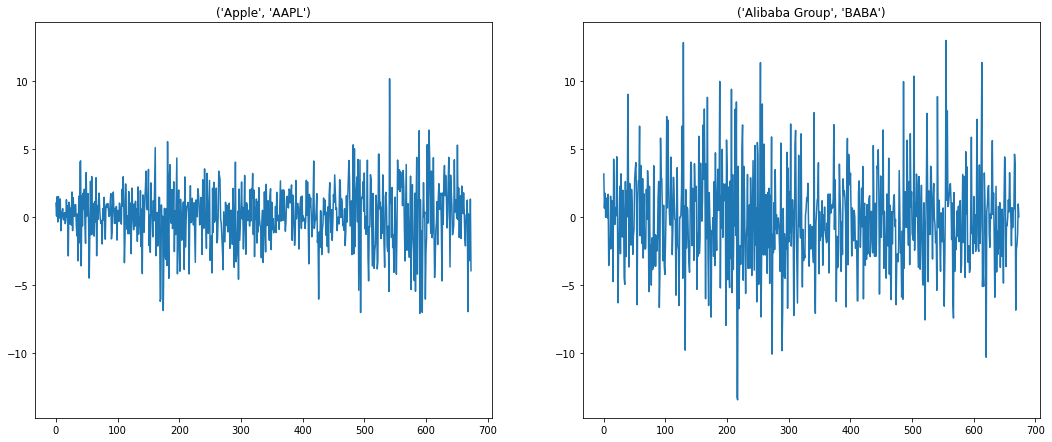

In [ ]:
# Plot Stock Movements
plt.figure(figsize=(18, 16))
ax1 = plt.subplot(221)
plt.plot(movements[0][:]);
plt.title(stocks[0]);

ax2 = plt.subplot(222, sharey=ax1)
plt.plot(movements[1][:]);
plt.title(stocks[1]);

## Preprocessing dataset

In [ ]:
from sklearn.preprocessing import Normalizer

# Create the normalizer
normalizer = Normalizer()
new = normalizer.fit_transform(movements)

print(new.max())
print(new.min())
print(new.mean())

0.22673075640827092
-0.24610409471556177
4.04678950117632e-06


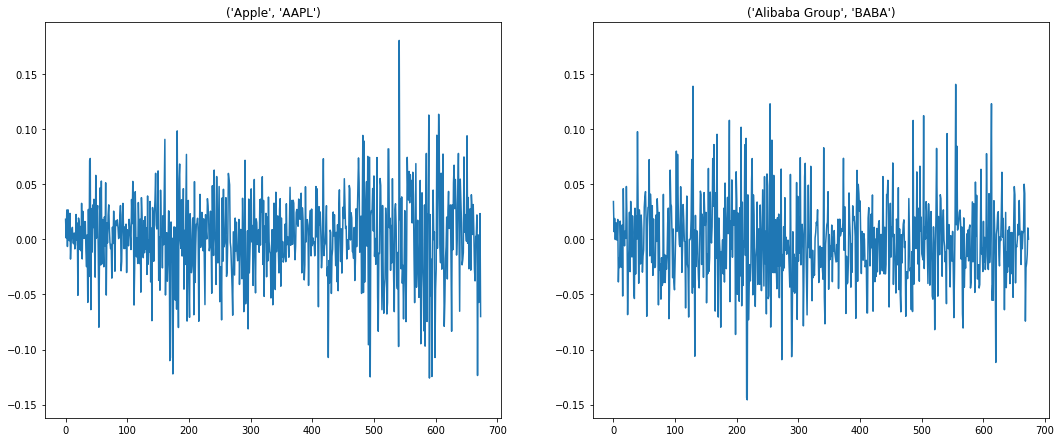

In [ ]:
# Plot Stock Movements
plt.figure(figsize=(18, 16))
ax1 = plt.subplot(221)
plt.plot(new[0][:]);
plt.title(stocks[0]);

ax2 = plt.subplot(222, sharey=ax1)
plt.plot(new[1][:]);
plt.title(stocks[1]);

### Markowitz portfolio optimization

Portfolio optimization is the process of selecting the best portfolio, out of the set of all portfolios being considered, according to some objective. The objective typically maximizes factors such as expected return, and minimizes costs like financial risk.

In this submission we're starting with a Classical Mean Variance Optimization, this's a portfolio model that uses the mean and variance of asset returns to express the trade-off between portfolio returns and risks. This model is expressed as an optimization problem with two conflicting objectives. That is, the expected return on results from the portfolio needs to be maximized, on the other hand, portfolio risk represented by the variance of returns from different assets, needs to be minimized

In [ ]:
stock = panel_data['Close']
stock

Symbols,AAPL,BABA,IBM,MSFT,TSLA
Date,,,,,
2020-01-02,75.087502,219.770004,129.464630,160.619995,28.684000
2020-01-03,74.357498,217.000000,128.432129,158.619995,29.534000
2020-01-06,74.949997,216.639999,128.202682,159.029999,30.102667
2020-01-07,74.597504,217.630005,128.288712,157.580002,31.270666
2020-01-08,75.797501,218.000000,129.359467,160.089996,32.809334
...,...,...,...,...,...
2022-08-29,161.380005,96.599998,130.309998,265.230011,284.820007
2022-08-30,158.910004,93.839996,129.580002,262.970001,277.700012
2022-08-31,157.220001,95.410004,128.449997,261.470001,275.609985


In [ ]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt import EfficientFrontier, objective_functions

mu = mean_historical_return(stock)
S = CovarianceShrinkage(stock).ledoit_wolf()
ef = EfficientFrontier(mu, S)
ef.add_objective(objective_functions.L2_reg)
weights = ef.max_sharpe()

/usr/local/lib/python3.7/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:258: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  "max_sharpe transforms the optimization problem so additional objectives may not work as expected."


In [ ]:
cleaned_weights = ef.clean_weights()
print('The weights of the 5 stocks should be',cleaned_weights)

The weights of the 5 stocks should be OrderedDict([('AAPL', 0.15054), ('BABA', 0.0), ('IBM', 0.0), ('MSFT', 0.04404), ('TSLA', 0.80542)])


In [ ]:
## The Expected return
ef.portfolio_performance(verbose=True)

Expected annual return: 111.6%
Annual volatility: 61.9%
Sharpe Ratio: 1.77


(1.115618181571927, 0.6192312859095769, 1.7693198107111054)

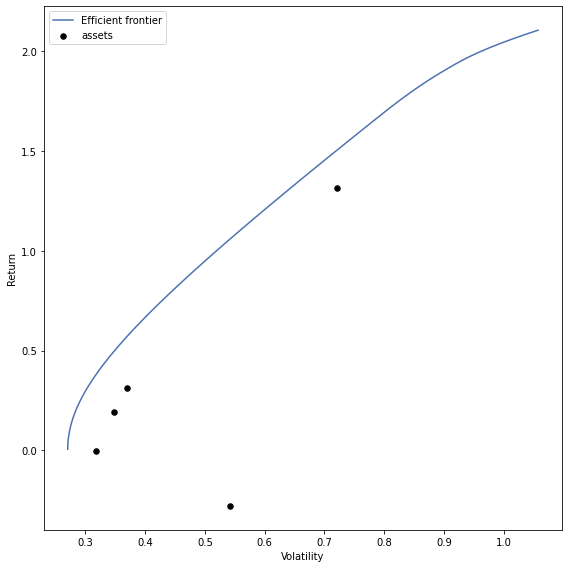

In [ ]:
import matplotlib.pyplot as plt
from pypfopt import plotting
ef = EfficientFrontier(mu, S, weight_bounds=(None, None))
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
plt.show()

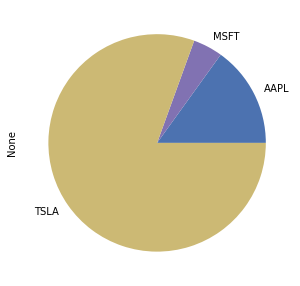

In [ ]:
# chart of the weights. 
pd.Series(weights).plot.pie(figsize=(5,5));

** Using classic mean-variance (MV) portfolio model by Markowitz, TSLA security is the best portfolio among 5 securities.

**Bummer!!** <br>
Using Markowitz model, we can see that all portfolios lie below the Efficient Frontier which is not good enough because the return would be lower for the given risk. Portfolios that lie to the right of the Efficient Frontier would not be good enough, as there is higher risk for a given rate of return. Thus, our decision to take TSLA as an optimal portfolio might not accurate. <br>
We need to run additionnal tests. Here we'll do the following:


1.   Denoising for portfolio selection
2.   Clustering for portfolio selection
3.   Backtesting for portfolio selection


# Step 2 and step 3
# The ‘best’ portfolio with superior risk reward relationship: TSLA

## Denoising for stock selection

In [ ]:
# Install pacage for denoising
! pip install -U git+https://github.com/emoen/Machine-Learning-for-Asset-Managers --quiet

In [ ]:
from Machine_Learning_for_Asset_Managers import ch2_marcenko_pastur_pdf as c

# Get the covariance of the stock, here the covariance calculated in the previous step has been applied.  
cov = S
print('Covariance of the 5 stocks\n',cov)

Covariance of the 5 stocks
 Symbols      AAPL      BABA       IBM      MSFT      TSLA
Symbols                                                  
AAPL     0.136439  0.069893  0.049008  0.098410  0.134694
BABA     0.069893  0.293995  0.027263  0.065961  0.129966
IBM      0.049008  0.027263  0.101232  0.048291  0.048947
MSFT     0.098410  0.065961  0.048291  0.121096  0.124847
TSLA     0.134694  0.129966  0.048947  0.124847  0.519959


In [ ]:
# marcenko-pastur pdf and eigenvalues of random matrix x
N = 1000
T = 10000
x = np.random.normal(0, 1, size = (T, N))
cor = np.corrcoef(x, rowvar=0) # cor.shape = (1000,1000). If rowvar=1 - row represents a var, with observations in the columns.
eVal0 , eVec0 = c.getPCA( cor ) 
q=x.shape[0]/float(x.shape[1])
pdf0 = c.mpPDF(1., q, pts=N)
pdf1 = c.fitKDE(np.diag(eVal0), bWidth=.005) #empirical pdf

In [ ]:
# Covariance matrix of the portfolio
corr0 = c.cov2corr(cov)
eVal01, eVec01 = c.getPCA(corr0)

(array([4.0877831, 0.       , 0.       , 0.       , 0.       , 4.0877831,
        0.       , 0.       , 0.       , 4.0877831, 0.       , 0.       ,
        0.       , 4.0877831, 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 4.0877831]),
 array([0.23399515, 0.28292143, 0.3318477 , 0.38077398, 0.42970025,
        0.47862653, 0.5275528 , 0.57647908, 0.62540535, 0.67433163,
        0.7232579 , 0.77218418, 0.82111045, 0.87003673, 0.918963  ,
        0.96788928, 1.01681555, 1.06574183, 1.1146681 , 1.16359438,
        1.21252065, 1.26144693, 1.3103732 , 1.35929948, 1.40822575,
        1.45715203, 1.50607831, 1.55

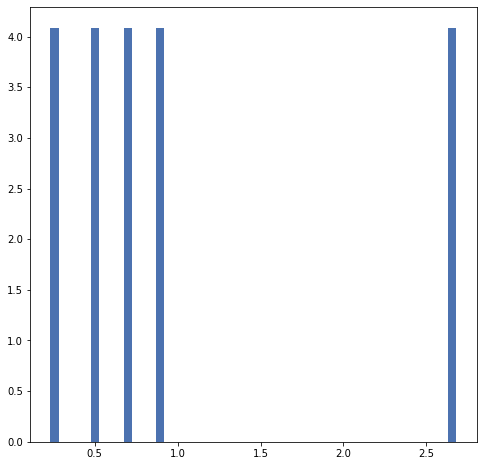

In [ ]:
# Figure of KDE and MPD
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.hist(np.diag(eVal01), density = True, bins=50) # Histogram the eigenvalues

In [ ]:
#fitting the marcenko-pastur pdf - find variance
eMax0, var0 = c.findMaxEval(np.diag(eVal01), q, bWidth=.01)
nFacts0 = eVal01.shape[0]-np.diag(eVal01)[::-1].searchsorted(eMax0)

sse:5007.208851352265
sse:5007.208447968755
sse:2458.1599384672527
sse:2458.1599512448934
found errPDFs0.99999


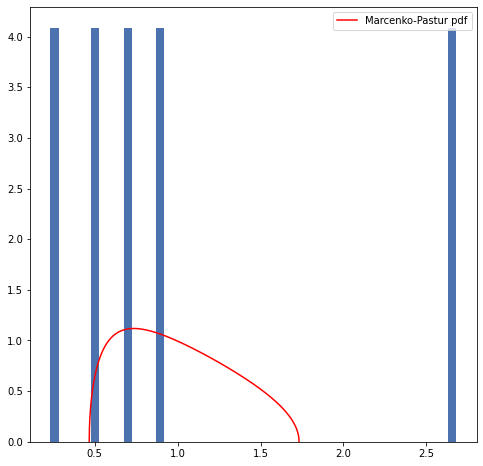

In [ ]:
# Plotting
pdf0 = c.mpPDF(var0, q=x.shape[0]/float(x.shape[1]), pts=N)
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.hist(np.diag(eVal01), density = True, bins=50) # Histogram the eigenvalues

plt.plot(pdf0.keys(), pdf0, color='r', label="Marcenko-Pastur pdf")
#plt.plot(pdf1.keys(), pdf1, color='g', label="Empirical:KDE")
#plt.plot(x_range, pdf2, color='b', label="Eigenvalues of random-matrix with signal")
plt.legend(loc="upper right")
plt.show()   

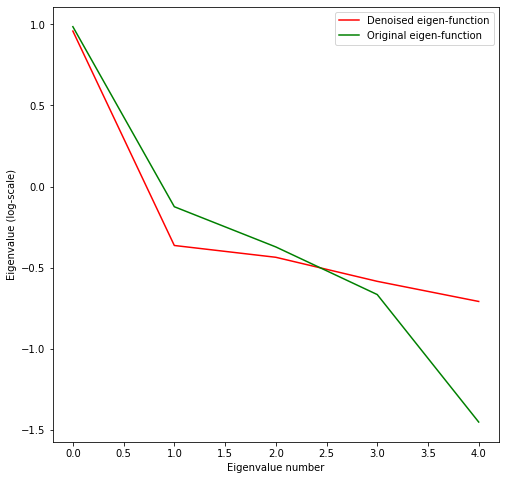

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in log


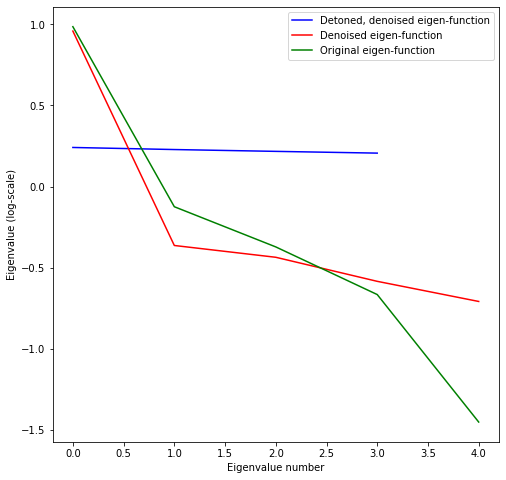

In [ ]:
# denoising and detoning by constant residual eigenvalue
corr1 = c.denoisedCorr(eVal01, eVec01, nFacts0)   
eVal1, eVec1 = c.getPCA(corr1)

denoised_eigenvalue = np.diag(eVal1)
eigenvalue_prior = np.diag(eVal01)
plt.plot(range(0, len(denoised_eigenvalue)), np.log(denoised_eigenvalue), color='r', label="Denoised eigen-function")
plt.plot(range(0, len(eigenvalue_prior)), np.log(eigenvalue_prior), color='g', label="Original eigen-function")
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue (log-scale)")
plt.legend(loc="upper right")
plt.show()

corr_detoned_denoised = c.detoned_corr(corr1, eVal1, eVec1)

eVal1_detoned, eVec1_detoned = c.getPCA(corr_detoned_denoised)
detoned_denoised_eigenvalue = np.diag(eVal1_detoned)
denoised_eigenvalue = np.diag(eVal1)
eigenvalue_prior = np.diag(eVal01)

plt.plot(range(0, len(detoned_denoised_eigenvalue)), np.log(detoned_denoised_eigenvalue), color='b', label="Detoned, denoised eigen-function")
plt.plot(range(0, len(denoised_eigenvalue)), np.log(denoised_eigenvalue), color='r', label="Denoised eigen-function")
plt.plot(range(0, len(eigenvalue_prior)), np.log(eigenvalue_prior), color='g', label="Original eigen-function")
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue (log-scale)")
plt.legend(loc="upper right")
plt.show()

In [ ]:
# The denoised matrix
corr1

array([[1.        , 0.38754247, 0.4008005 , 0.507748  , 0.45190627],
       [0.38754247, 1.        , 0.30632294, 0.38806054, 0.34538194],
       [0.4008005 , 0.30632294, 1.        , 0.4013363 , 0.35719764],
       [0.507748  , 0.38806054, 0.4013363 , 1.        , 0.45251038],
       [0.45190627, 0.34538194, 0.35719764, 0.45251038, 1.        ]])

In [ ]:
# The matrix after be denoising and detoning
corr_detoned_denoised


array([[ 1.        , -0.25338027, -0.25482779, -0.22891303, -0.25159558],
       [-0.25338027,  1.        , -0.2424503 , -0.25329885, -0.2530864 ],
       [-0.25482779, -0.2424503 ,  1.        , -0.2547212 , -0.25616844],
       [-0.22891303, -0.25329885, -0.2547212 ,  1.        , -0.25136642],
       [-0.25159558, -0.2530864 , -0.25616844, -0.25136642,  1.        ]])

In [ ]:
# Using the denoised matrix, we can again get the new portfolio
ef = EfficientFrontier(mu, corr1)
ef.add_objective(objective_functions.L2_reg)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print('The weights of the 5 stocks after denoising should be',cleaned_weights)

The weights of the 5 stocks after denoising should be OrderedDict([('AAPL', 0.00123), ('BABA', 0.0), ('IBM', 0.0), ('MSFT', 0.0), ('TSLA', 0.99877)])


/usr/local/lib/python3.7/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:258: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  "max_sharpe transforms the optimization problem so additional objectives may not work as expected."


In [ ]:
## The Expected return for denoised matrix
ef.portfolio_performance(verbose=True)

Expected annual return: 131.5%
Annual volatility: 99.9%
Sharpe Ratio: 1.30


(1.314721552184871, 0.9993248802826298, 1.2955962347487004)

In [ ]:
# New portfolio with denoised and detoned matrix
ef = EfficientFrontier(mu, corr_detoned_denoised)
ef.add_objective(objective_functions.L2_reg)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print('The weights of the 5 stocks after denoising and detoning should be',cleaned_weights)

The weights of the 5 stocks after denoising and detoning should be OrderedDict([('AAPL', 0.20095), ('BABA', 0.01988), ('IBM', 0.10555), ('MSFT', 0.16244), ('TSLA', 0.51118)])


In [ ]:
## The Expected return for denoised and detoned matrix
ef.portfolio_performance(verbose=True)

Expected annual return: 76.1%
Annual volatility: 41.7%
Sharpe Ratio: 1.77


(0.7607958807226721, 0.41739813946292703, 1.7747944005592986)

### Conclusion
* We can clearly see there is a significant increase in the expected annual return and decrease in Sharpe ratio after denoising. 
* The weights of the 5 stocks after denoising and detoning results shows that TSLA is the best portfolio among others
  

## Clustering for stock selection

<function matplotlib.pyplot.show(*args, **kw)>

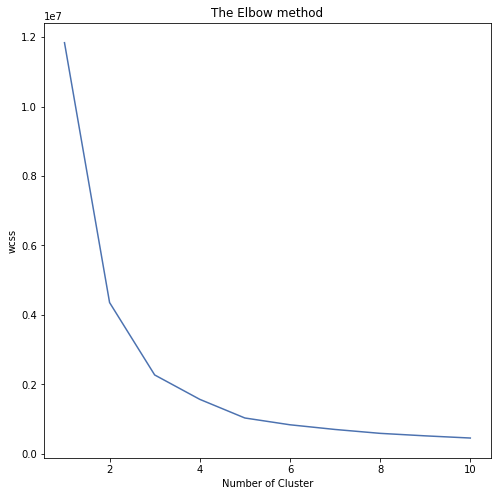

In [ ]:
# Elbow method for optimal cluster selection
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters= i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(stock)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow method')
plt.xlabel('Number of Cluster')
plt.ylabel('wcss')
plt.show

Using elbow method, the optimal number of cluster is 5

## Build Pipeline

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

# Define normalizer
normalizer = Normalizer()

# Create a KMeans model - 5 clusters
kmeans = KMeans(n_clusters=5, max_iter=1000)

# Make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer, kmeans)

In [ ]:
# Fit pipeline to dail stock movements
pipeline.fit(movements)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(max_iter=1000, n_clusters=5))])

In [ ]:
print(kmeans.inertia_)

0.0


In [ ]:
stock

Symbols,AAPL,BABA,IBM,MSFT,TSLA
Date,,,,,
2020-01-02,75.087502,219.770004,129.464630,160.619995,28.684000
2020-01-03,74.357498,217.000000,128.432129,158.619995,29.534000
2020-01-06,74.949997,216.639999,128.202682,159.029999,30.102667
2020-01-07,74.597504,217.630005,128.288712,157.580002,31.270666
2020-01-08,75.797501,218.000000,129.359467,160.089996,32.809334
...,...,...,...,...,...
2022-08-29,161.380005,96.599998,130.309998,265.230011,284.820007
2022-08-30,158.910004,93.839996,129.580002,262.970001,277.700012
2022-08-31,157.220001,95.410004,128.449997,261.470001,275.609985


## Clustering

In [ ]:
# Predict the cluster labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and stock
df = pd.DataFrame({'labels':labels, 'stocks': stocks})

# Display df sorted by cluster label
print(df.sort_values('labels'))

   labels                 stocks
0       0          (Apple, AAPL)
2       1             (IBM, IBM)
1       2  (Alibaba Group, BABA)
4       3       (Tsla Inc, TSLA)
3       4      (Microsoft, MSFT)


## Dimensionality Reduction with PCA

In [ ]:
from sklearn.decomposition import PCA

# Visualize the results on PCA-reduced data
reduced_data = PCA(n_components=2).fit_transform(new)

# Run kmeans on the reduced data
kmeans = KMeans(n_clusters=5)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

print(kmeans.inertia_)

# Create a DataFrame aligning labels and stock
df = pd.DataFrame({'labels':labels, 'stocks':stocks})
print(df.sort_values('labels'))

0.0
   labels                 stocks
3       0      (Microsoft, MSFT)
2       1             (IBM, IBM)
1       2  (Alibaba Group, BABA)
4       3       (Tsla Inc, TSLA)
0       4          (Apple, AAPL)


* The weights of the 5 stocks after clustering results shows that TSLA is the best portfolio among others

## Visualize cluster

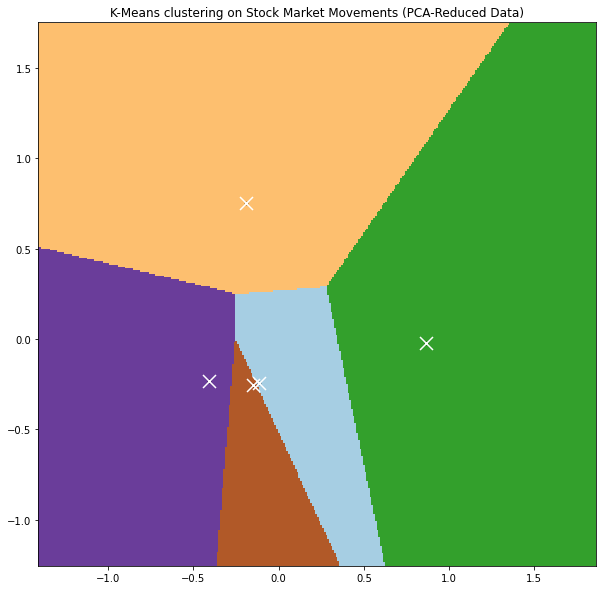

In [ ]:
# Define step size of mesh
h = 0.01

# Plot the decision boundary (+- 1 for padding)
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# Define colorplot
cmap = plt.cm.Paired

# Plot figure
plt.figure(figsize=(10, 10))
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = cmap, aspect='auto', origin='lower');
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5);

# Plot the centroids of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3, color='w', zorder=10);
plt.title('K-Means clustering on Stock Market Movements (PCA-Reduced Data)');
plt.xlim(x_min, x_max);
plt.ylim(y_min, y_max);

From the view of our unsupervised learning;
* Normalizing securities will make results better.
* The average daily returns of TSLA are still much better than the rest of stocks after Clustering. 
* TSLA is the best portfolio among 5. 

## Backtesting for stock selection

In [ ]:
# Data visualization with plotnine
from plotnine import *
import plotnine

# Autocorrelation
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Table styling
import seaborn as sns
cm = sns.light_palette('green', as_cmap = True)

# Cross validation and data partitioning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import KFold

# Grid-search
from sklearn.model_selection import GridSearchCV

# Data modelling
from sklearn.ensemble import RandomForestRegressor

# Evaluation
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

In [ ]:
df = stock

In [ ]:
# Data aggregation
df_avg = df.groupby(['Date']).mean().reset_index()
# Date type for Date
df_avg['Date'] = df_avg['Date'].astype('datetime64[ns]')

In [ ]:
print('Dimension data: {} rows and {} columns'.format(
    len(df_avg),
    len(df_avg.columns))
)
df_avg.head()

Dimension data: 674 rows and 6 columns


Symbols,Date,AAPL,BABA,IBM,MSFT,TSLA
0,2020-01-02,75.087502,219.770004,129.464630,160.619995,28.684000
1,2020-01-03,74.357498,217.000000,128.432129,158.619995,29.534000
2,2020-01-06,74.949997,216.639999,128.202682,159.029999,30.102667
3,2020-01-07,74.597504,217.630005,128.288712,157.580002,31.270666
4,2020-01-08,75.797501,218.000000,129.359467,160.089996,32.809334


In [ ]:
# Split into training data and testing data
df_train = df.iloc[:(len(df) - 100), :]
df_test = df.iloc[(len(df) - 100):, :]

In [ ]:
# Training data
df_train.tail()

Symbols,AAPL,BABA,IBM,MSFT,TSLA
Date,,,,,
2022-04-05,175.059998,111.000000,128.889999,310.880005,363.753326
2022-04-06,171.830002,107.680000,129.389999,299.500000,348.586670
2022-04-07,172.139999,104.269997,128.550003,301.369995,352.420013
2022-04-08,170.089996,103.529999,127.730003,296.970001,341.829987
2022-04-11,165.750000,101.550003,126.370003,285.260010,325.309998


In [ ]:
# Data partitioning - split training data into training and validation
X = df_train[df_train.columns[~df_train.columns.isin(
    ['Date', 'Time', 'TSLA'])]]
y = df_train['TSLA']

# Testing
X_test = df_test[df_test.columns[~df_test.columns.isin(
    ['Date', 'Time', 'TSLA'])]]

## Walk-Forward Optimization and Cross-Validation Technique
#### Data modelling - with parameters tuning

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(
    start = 200,
    stop = 2000,
    num = 2)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 2)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
scorers = {
            'mean_squared_error': make_scorer(mean_squared_error)
}

In [ ]:
random_grid

{'n_estimators': [200, 2000],
 'max_depth': [10, 50, None],
 'min_samples_leaf': [1, 2]}

In [ ]:
# # Define the model
randomForest = RandomForestRegressor()

#### Anchored walk-forward optimization

In [ ]:
# Grid-search
tscv = TimeSeriesSplit(n_splits = 10)
gridSearch = GridSearchCV(
    estimator = randomForest,
    param_grid = random_grid,
    scoring = scorers,
    cv = tscv,
    verbose = 3,
    refit = 'mean_squared_error',
    n_jobs = -1
)

In [ ]:
# Fit the model
gridSearch.fit(X, y)


Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=None),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 50, None],
                         'min_samples_leaf': [1, 2],
                         'n_estimators': [200, 2000]},
             refit='mean_squared_error',
             scoring={'mean_squared_error': make_scorer(mean_squared_error)},
             verbose=3)

In [ ]:
# Best parameters
gridSearch.best_params_

{'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 200}

In [ ]:
# Best score
gridSearch.best_score_

2477.954246162734

#### Non-anchored walk-forward optimization

In [ ]:
# Function for non-anchored walk-forward optimization
class NonAnchoredTimeSeriesSplit():
    def __init__(self, n_splits):
        self.n_splits = n_splits
    
    def get_n_splits(self, X, y, groups):
        return self.n_splits
    
    def split(self, X, y = None, groups = None):
        n_samples = len(X)
        k_fold_size = n_samples // self.n_splits
        indices = np.arange(n_samples)

        margin = 0
        for i in range(self.n_splits):
            start = i * k_fold_size
            stop = start + k_fold_size
            mid = int(0.8 * (stop - start)) + start
            yield indices[start: mid], indices[mid + margin: stop]

In [ ]:
# Grid-search
ntscv = NonAnchoredTimeSeriesSplit(n_splits = 10)
gridSearch = GridSearchCV(
    estimator = randomForest,
    param_grid = random_grid,
    scoring = scorers,
    cv = ntscv,
    verbose = 3,
    refit = 'mean_squared_error',
    n_jobs = -1
)

In [ ]:
# Fit the model
gridSearch.fit(X, y)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=<__main__.NonAnchoredTimeSeriesSplit object at 0x7f029eb89bd0>,
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 50, None],
                         'min_samples_leaf': [1, 2],
                         'n_estimators': [200, 2000]},
             refit='mean_squared_error',
             scoring={'mean_squared_error': make_scorer(mean_squared_error)},
             verbose=3)

In [ ]:
# Best parameters
gridSearch.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 200}

In [ ]:
# Best score
gridSearch.best_score_

840.4953182269268

#### k-fold cross validation

In [ ]:
# Grid-search
kfcv = KFold(n_splits = 10)
gridSearch = GridSearchCV(
    estimator = randomForest,
    param_grid = random_grid,
    scoring = scorers,
    cv = kfcv,
    verbose = 3,
    refit = 'mean_squared_error',
    n_jobs = -1
)

In [ ]:
# Fit the model
gridSearch.fit(X, y)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 50, None],
                         'min_samples_leaf': [1, 2],
                         'n_estimators': [200, 2000]},
             refit='mean_squared_error',
             scoring={'mean_squared_error': make_scorer(mean_squared_error)},
             verbose=3)

In [ ]:
# Best parameters
gridSearch.best_params_

{'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 2000}

In [ ]:
# Best score
gridSearch.best_score_

1883.6696270594962

# Step 4. 
## ‘testing’ the model on the 2 weeks of daily data
### Evaluating expected return and sharp ratio using improvement with denoising

In [ ]:
!pip install yfinance --quiet
import yfinance as yf
# Step 4
# Acquire the data up to Aug,16, which is the date of GWP2 
# Only two weeks

start_date = '2020-01-01'
end_date = '2022-08-16'

# Define the ticker list
tickers_list = ['AAPL', 'IBM', 'MSFT', 'BABA','TSLA']

# Create placeholder for data
stock = pd.DataFrame(columns=tickers_list)

# Fetch the data
for ticker in tickers_list:
    stock[ticker] = yf.download(ticker, 
                               start_date,
                               end_date)['Adj Close']
    
# Print stock info
print(stock)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                  AAPL         IBM        MSFT        BABA        TSLA
Date                                                                  
2020-01-02   73.683571  112.916939  156.592010  219.770004   28.684000
2020-01-03   72.967224  112.016403  154.642166  217.000000   29.534000
2020-01-06   73.548637  111.816292  155.041885  216.639999   30.102667
2020-01-07   73.202728  111.891327  153.628250  217.630005   31.270666
2020-01-08   74.380287  112.825211  156.075287  218.000000   32.809334
...                ...         ...         ...         ...         ...
2022-08-09  164.919998  129.470001  281.702057   91.190002  283.333344
2022-08-10  169.

In [ ]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
mu = mean_historical_return(stock)
S = CovarianceShrinkage(stock).ledoit_wolf()

In [ ]:
from pypfopt import EfficientFrontier, objective_functions
ef = EfficientFrontier(mu, S)
ef.add_objective(objective_functions.L2_reg)
weights = ef.max_sharpe()

/usr/local/lib/python3.7/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:258: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.


In [ ]:
cleaned_weights = ef.clean_weights()
ef.save_weights_to_file("weights.txt")  # saves to file
print('The weights of the 5 stocks should be',cleaned_weights)

The weights of the 5 stocks should be OrderedDict([('AAPL', 0.16379), ('IBM', 0.0), ('MSFT', 0.08164), ('BABA', 0.0), ('TSLA', 0.75457)])


In [ ]:
# Expected return
ef.portfolio_performance(verbose=True)

Expected annual return: 120.4%
Annual volatility: 59.8%
Sharpe Ratio: 1.98


(1.2042077279647048, 0.5979130635473329, 1.9805684139747162)

In [ ]:
# If we use the same parameter for the portfolio to the date up to today(Sept, 6,2022)
# Covariance matrix of the portfolio and we get the estimate of the covariance matrix
corr0 = c.cov2corr(S)
eVal01, eVec01 = c.getPCA(corr0)

corr1 = c.denoisedCorr(eVal01, eVec01, nFacts0)   
eVal1, eVec1 = c.getPCA(corr1)
denoised_eigenvalue = np.diag(eVal1)
corr_detoned_denoised = c.detoned_corr(corr1, eVal1, eVec1)
eVal1_detoned, eVec1_detoned = c.getPCA(corr_detoned_denoised)
detoned_denoised_eigenvalue = np.diag(eVal1_detoned)
denoised_eigenvalue = np.diag(eVal1)
eigenvalue_prior = np.diag(eVal01)

In [ ]:
# The performace analysis
ef.portfolio_performance(verbose=True)

Expected annual return: 59.9%
Annual volatility: 100.0%
Sharpe Ratio: 0.58


(0.5993415518027381, 0.9999999999999999, 0.5793415518027382)

#### Step 4 Conclusion 
We see using training data’s covariance matrix did not improve the portfolio performance. The expected return and Sharpe ratio have dropped, while the volatility has increased.


# Step 5
## Questions and Answers

```
1. What are the differences in performance according to these metrics for the
different combination of improvements?
```



**Answer**

The portfolio has shown different performances using different metrics with different combinations of these improvements. We can clearly see that the expected returns and Sharpe ratio have been improved while the volatility has decreased. Normalizing the data will generate a better result, back testing allows us to see how our strategy works using historical data. 

```
2. What reasons might explain these differences in performances (with specific
reference to the financial products, the historical data, the math of the model
dynamics, etc.),

```

**Answer** <br>
The performance of our portfolio is clearly measured in 3 KPIs, which are; <br>
- Expected return,
- Annual volatility
- Sharpe Ratio<br> 
as mentioned below;

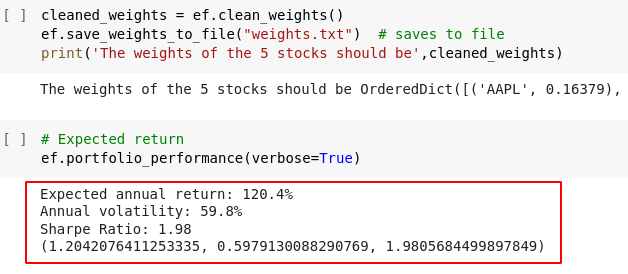

**Notes!** <br>

1.   **Sharpe ratio** is the measure of risk-adjusted return of a financial portfolio. A portfolio with a higher Sharpe ratio is considered superior relative to its peers. 
Formula
$$
S_a=\frac{E\left[R_a-R_b\right]}{\sigma_a}
$$
$S_a=$ Sharpe ratio <br>
$E=$ expected value <br>
$R_a=$ asset return <br>
$\sigma_a=$ standard deviation of the asset excess return

* A negative Sharpe ratio means the portfolio has underperformed its benchmark. All other things being equal, an investor typically prefers a higher positive Sharpe ratio as it has either higher returns or lower volatility. However, a negative Sharpe ratio can be made higher by either increasing returns (a good thing) or increasing volatility (a bad thing).
<br><br>

2.   **Annual Volatility** the relative rate at which the price of a security moves up and down. Volatility is found by calculating the annualized standard deviation of daily change in price. If the price of a stock moves up and down rapidly over short time periods, it has high volatility. If the price almost never changes, it has low volatility.
Stock with High Volatility are also knows as High Beta stocks.

$$
\sigma_{i, t}=\sqrt{\frac{1}{n-1} \sum_1^n\left(\text { return }_{i, k}-\text { mean }_{i, t}\right)^2}$
$$

* The return $n_{i, k}$ is the daily return of stock $i$ in day $k$ of year $t$ mean $_{i, t}$ is the annual average of all daily stock returns of firm i in year $\mathrm{t}$ $\mathrm{n}$ is the number of trading days in year $\mathrm{t}$
<br><br>

3.   **The expected return** is the amount of profit or loss an investor can anticipate receiving on an investment.
An expected return is calculated by multiplying potential outcomes by the odds of them occurring and then totaling these results.

$$
\bar{r}_a=\gamma_f+\beta_a\left(r_m-r_f\right)
$$
- Expected return = risk free premium $+$ Beta (expected market return - risk free premium). Investopedia
where:
- $r_a=$ expected return;
- $r_f=$ the risk-free rate of return;
- $\beta=$ the investment's beta; and
- $r_m=$ the expected market return



In addition to that, we've managed to implement the list of weighting after each improvement to examined the superiority and inferioriy of all assets under our analysis. 
Here is the list of Weighting after improvement using dinoising;

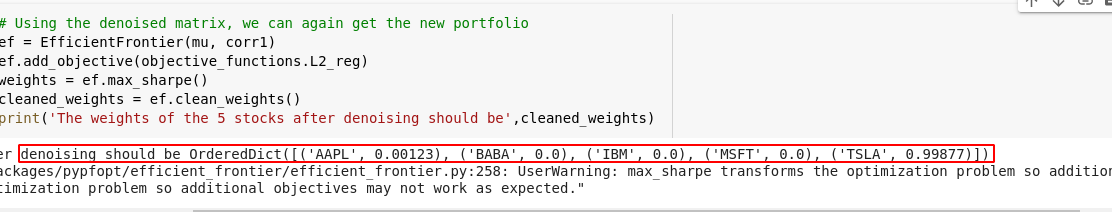


```
3. In which cases, if any, does the incremental gain in performance according to the
chosen metrics justify the additional complexity and effort of the improvements?
```

**Answer** <br>
Running clustering has given us the labels which were completely changed after applying dimentionarity reduction with PCA. 
Dimensionality Reduction and PCA. Dimensionality reduction refers to reducing the number of input variables for a dataset. If your data is represented using rows and columns, such as in a spreadsheet, then the input variables are the columns that are fed as input to a model to predict the target variable. 
Dimensionality Reduction helps in data compression, and hence reduced storage space. It reduces computation time. It also helps remove redundant features, if any. Removes Correlated Features, that's why it's potentially essential in Clustering.

Using expected annual return, Sharpe ratio and annual volatility, we saw how de-noising and de-toning as an improvements strategy helped in increasing the Sharpe ratio and reducing the annual volatility of our portfolio. This can be explained by how the complexity of the strategy of de-noising in stabilizing the covariance matrix which measures the inherent risk of the portfolio, this helps removes the eigenvalues that represent noise rather than useful information.